In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5LiCd1EsXzwieJ_MgeqBB4sdD69Ff3FtKHWXEsqZEoVSxWBrCQYdM


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install http://sourceforge.net/projects/matplotlib/files/matplotlib-toolkits/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759564 sha256=dfc9b6a7d37f55f2bc2c0dd87a956c7c0d19bbf03122c031f053db022e4f181a
  Stored in directory: /tmp/pip-ephem-wheel-cache-gg52ukee/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap
     

In [ ]:
!pip install netcdf4
!pip install pyMCR
!pip install geopandas

     |████████████████████████████████| 921kB 3.1MB/s 
  Created wheel for pyMCR: filename=pyMCR-0.3.2-cp37-none-any.whl size=26472 sha256=7e9d4fa8c500ec6e6fd612c36c64c423022d9480d02d297bc7cae4fd11920386
  Stored in directory: /root/.cache/pip/wheels/bf/61/c2/59ca0fb0ad90a9f608586e960a20e03449982e39d88ab2be2f
Successfully built pyMCR
     |████████████████████████████████| 1.0MB 2.3MB/s 
     |████████████████████████████████| 15.3MB 284kB/s 


# Libraries

In [ ]:
#!/bin/env python
import sys
import glob
import os
import re
import numpy as np
import numpy.ma as ma
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from scipy.interpolate import griddata
import torch
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from skimage import measure, transform
#from skimage.segmentation import slic
#from skimage.segmentation import mark_boundaries
from skimage import io
from skimage import data, segmentation, color
from scipy.ndimage import label
from scipy.spatial import distance
from scipy import ndimage
from shapely.geometry import Point, LineString, Polygon, LinearRing, MultiPoint
from descartes import PolygonPatch
import networkx as nx
import tarfile
import string
import calendar
import cv2
import random
from google.colab.patches import cv2_imshow
from mpl_toolkits.basemap import Basemap,cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import netCDF4
from geopandas import GeoSeries
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.signal import find_peaks
from sklearn.metrics import confusion_matrix





In [ ]:
DIR_DATA = '/content/drive/MyDrive/StageUParis/DATA/H2O/'
DIR_TRAIN = '/content/drive/MyDrive/StageUParis/DATA/LABELS/'
DIR_TEST = '/content/drive/MyDrive/StageUParis/Test/'

# Class **SplitImageLevels**

In [ ]:
class SplitImageLevels():  
  image_type = "LT"
  year = 2008
  month = 5
  day = 1

  degree = 0.625
  pixel_size = 0.3125
  vmax = 35
  vmin = 0

  weight_gray_values = 1
  N_CLUSTERS = 2

  images = list()

  def __init__ (self,DIR_DATA=DIR_DATA, DIR_TRAIN=DIR_TRAIN):
    self.DIR_DATA = DIR_DATA
    self.DIR_TRAIN = DIR_TRAIN





  ############################################################################
  ####                      GETTERS AND SETTERS
  ############################################################################

  def set_DIR_DATA (self, DIR_DATA):
    self.DIR_DATA = DIR_DATA

  def get_DIR_DATA (self):
    return self.DIR_DATA

  def set_DIR_TRAIN (self, DIR_TRAIN):
    self.DIR_TRAIN = DIR_TRAIN
  
  def get_DIR_TRAIN (self):
    return self.DIR_TRAIN

  def set_DIR_TEST (self, DIR_TEST):
    self.DIR_TEST = DIR_TEST

  def get_DIR_TEST (self):
    return self.DIR_TEST

  def set_year(self,year):
    self.year = year

  def get_year(self):
    return self.year
  
  def set_month(self,month):
    self.month = month
  
  def get_month(self):
    return self.month

  def set_day(self,day):
    self.day = day

  def get_day(self):
    return self.day

  def set_image_type(self,image_type):
    self.image_type = image_type

  def get_image_type(self):
    return self.image_type

  def set_image_name(self,image_name):
    self.image_name = image_name

  def get_image_name(self):
    return self.image_name

  def set_pixel_size(self, degree, size):
    self.degree = degree
    self.pixel_size = size

  def set_region_area(self, max_area, min_area):
    self.max_area = max_area
    self.min_area = min_area

  def set_weight_gray_values(self, weight_gray_values):
    self.weight_gray_values = weight_gray_values

  def set_cluster_value (self, N_CLUSTERS):
    self.N_CLUSTERS = N_CLUSTERS

  def get_cluster_value(self):
    return self.N_CLUSTERS






  ############################################################################
  ####                        READ THE DATA
  ############################################################################

  def get_image_by_leves (self):
    #for index, layer in enumerate(np.arange(self.start, self.end, self.steps)):
    index = 0
    
    lat_g = np.arange(20.,50.,self.degree)
    lon_g = np.arange(100.,150.,self.degree)

    #initialization
    self.colgrid = np.zeros([lat_g.shape[0],lon_g.shape[0]], np.uint8)

    for year in range(self.year, self.year + 1):
      for month in range(self.month, self.month + 1):
        for day in range(self.day, self.day + 1):

          fname = self.DIR_DATA + 'IASIdaily_' + str(year) + '%02d'%month+'%02d'%day+'.nc'
          self.image_name = self.image_type + '-level-' + str(year) + '%02d'%month+'%02d'%day+'.png'

          print('reading info ...')

          if not(os.path.isfile(fname)):
            continue

          nc = netCDF4.Dataset(fname)
          flag = nc.variables['flag'][:]
          mask1 = (flag == 0) # Without clouds
          
          lat = nc.variables['lat'][mask1]
          lon = nc.variables['lon'][mask1]
          col = nc.variables[self.image_type][mask1]
          nc.close()

          mask2 = (np.isnan(col) == False) 

          # gridding the data
          for ilat in range(lat_g.shape[0]):
            for ilon in range(lon_g.shape[0]):
              # Grille régulier
              # 25 km
              # 0 25 degrée lattitude et longitude

              # Grille regulier of 0.125 degree
              maskgrid = (lat[:] >= (lat_g[ilat] - self.pixel_size)) & (lat[:] < (lat_g[ilat] + self.pixel_size)) & (lon[:] >= (lon_g[ilon] - self.pixel_size)) & (lon[:] < (lon_g[ilon] + self.pixel_size))
              
              # Defining invalid data
              mask = mask2 & maskgrid

              if len(col[mask]) != 0:
                median = np.mean(col[mask])
                #if median >= layer:
                self.colgrid[ilat,ilon] = median

          print('data readed correctly')

          # We mark the values at colgrid as invalid because they are maybe false positives or bad sampling
          self.colgrid1 = ma.masked_values(self.colgrid, 0.)

          self.v_x, self.v_y = np.meshgrid(lon_g, lat_g)
          gradx, grady = np.gradient(self.colgrid, edge_order=1)

          fig, (ax1) = plt.subplots(1, 1, figsize = (11,8))
          ax1.pcolormesh(self.v_x, self.v_y, self.colgrid, shading='nearest',cmap='gray', vmin=self.vmin, vmax=self.vmax)
          ax1.axis('off')
          fig.savefig(self.image_name, bbox_inches='tight', pad_inches=0)
          plt.close(fig)


          fig2, (ax2) = plt.subplots(1, 1, figsize = (11,8))
          ax2.pcolormesh(self.v_x, self.v_y, self.colgrid1, shading='nearest',cmap='jet', vmin=self.vmin, vmax=self.vmax)
          ax2.axis('off')
          fig2.savefig("color-" + self.image_name, bbox_inches='tight', pad_inches=0)
          plt.close(fig2)








  ###############################################################
  ###             LOAD IMAGE INFORMATION
  ###############################################################

  def load_image_from_files (self, filename):
    img_bgr = io.imread(filename) 
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    return img_bgr, gray



  def process_set_images(self, image, image_color):
    image, _, background = self.filter_image(image)
    regions, _ = self.get_mser_regions(image)
    
    regx, regy, polys, lines, values = self.set_mser_regions(image, background, regions[:])
    #self.divide_regions(image,regx, regy, polys, lines, values)
    labels, centers = self.classify_neighbors(image, regx, regy,polys, values)
    self.plot_mser_final_regions(image, regx, regy, values)
    
    #self.show_mser_red_regions(image, regions[:], labels)
    #polys = self.classify_regions(image,poly[:])
    #polys = self.classify_all_regions(image, poly[:])
    #self.plot_mser_regions_3d(regx, regy, values, labels)
    







  ###############################################################
  ###             TRAITEMENT
  ###############################################################

  def get_pollution_image_reference(self, image):

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Search Pollution:
    reds_colors = np.array([255,0,0], dtype=np.uint8)
    #high_reds_colors = np.array([130, 255, 255], dtype=np.uint8)

    # Search Mix:
    low_blues_colors = np.array([100,65,75], dtype=np.uint8)
    high_blues_colors = np.array([130, 255, 255], dtype=np.uint8)
    
    pollution_mask = cv2.inRange(image_hsv, reds_colors, reds_colors)

    print("pollution mask", pollution_mask)
    
    # Momentos
    #moments = cv2.moments(mascara_azul)
    #area = int(moments['m00'])
    #print("Pixeles activos "+str(area) +" pixeles")


  def resize_image_percentage (self, image, scale_percent = 100):
    ### SCALE
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    return image

  def normalize_image(self, image):
    return cv2.normalize(image, np.ones((image.shape[0], image.shape[0])) , 0, 255, cv2.NORM_MINMAX )

  def pretraitement_image(self, image, kernel_size = 9, iterations=3):
    ### MORPHO FILTERS
    kernel = np.ones((kernel_size,kernel_size),np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations = iterations)

    return image

  ## REMOVING THE HOLES
  def masking_interest_region(self, image):
    # Take the holes (pixels value = 0) and set it as 255
    image = cv2.normalize(image, np.ones((image.shape[0], image.shape[0])) , self.vmin, self.vmax, cv2.NORM_MINMAX )
    image = np.where(image == 0, 255, image) 
    image = np.where(image != 255, 0, image) # This is the mask of the background
    image_holes_dilate = cv2.morphologyEx(image, cv2.MORPH_DILATE, np.ones((3,3),np.uint8), iterations = 3)
    image_holes_dilate_inv = cv2.bitwise_not(image_holes_dilate) # This is the mask of the foreground

    return image_holes_dilate, image_holes_dilate_inv

  def find_edges (self, image):
    ## Below code convert image gradient in both x and y direction
    image = cv2.Laplacian(image, cv2.CV_64F, ksize=3) 
    image = np.uint8(np.absolute(image))
    #image_laplacian = cv2.bitwise_and(image_laplacian,image_laplacian,mask = image_holes_dilate_inv)

    return image


  def filter_image (self, image):
    image = self.resize_image_percentage(image, 100)
    image = self.pretraitement_image(image,6,3)
    background, foreground = self.masking_interest_region(image)
    
    return image, foreground, background

  def get_mser_regions(self, image, vmin=300,vmax=50000):
    mser = cv2.MSER_create(1, vmin, vmax, .25, 1., 1000, 1.001, 0.003, 5)
    #(1, 100, 20000, .25, 1., 1000, 1.001, 0.003, 5)
   
    #fig, ax = plt.subplots(1,1)
    #colorinfo = ax.imshow(image, cmap='gray')
    #fig.colorbar(colorinfo)

    regions, bboxes = mser.detectRegions(image)
    regions = sorted(regions, key=cv2.contourArea, reverse=True)

    return regions, bboxes







  ###############################################################
  ###             PLOTTING
  ###############################################################

  def show_mser_red_regions(self, image, regions, labels):
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    #colors = np.array([(255,0,0),[(0,255,0),(0,0,255),(0,255,255),(255,255,0),(100,0,100),(24,180,0)])
    colors = list([(255,0,0),(0,255,0),(0,0,255),(0,255,255),(255,255,0),(100,0,100),(24,180,0)])

    #for i in labels:
    #  print(colors[i])

    #for l in labels:
    for i, p in enumerate(regions[:]):
      if i == (len(regions[:3]) - 1):
        color = (255,0,0)
      elif i == (len(regions[:3]) - 2):
        color = (0,0,255)
      else:
        color = (0,255,0)

      #print("color", color, "for", i)
      for k in p:
        cv2.circle(image, (k[0],k[1]), radius=0, color=color, thickness=-1)

    fig, ax = plt.subplots(1,1)
    ax.imshow(image)
    #ax.invert_yaxis()












  def set_mser_regions(self, image, background, regions):
    regsX = list()
    regsY = list()
    regsPoly = list()
    regsLine = list()
    values_gray = list()

    for j,r in enumerate(regions):
      region = list()
      hull = cv2.convexHull(r)

      for h in hull:
          region.append(h[0].tolist())

      region.append(region[0])
      poly = Polygon(region)
      line = LineString(region)
      value_pixel = self.get_region_value(image,poly)

      if np.isnan(value_pixel):
        print(value_pixel)
        break
      #xs = [pnt[0] if background[pnt[1],pnt[0]] != 255 else np.nan for pnt in r[:]]
      #ys = [pnt[1] if background[pnt[1],pnt[0]] != 255 else np.nan for pnt in r[:]]
      xs = [pnt[0] for pnt in r]
      ys = [pnt[1] for pnt in r]

      regsX.append(xs)
      regsY.append(ys)
      regsPoly.append(poly)
      regsLine.append(line)
      values_gray.append(value_pixel)

    return regsX, regsY, regsPoly, regsLine, values_gray

  def export_current_region (self, image, regsX, regsY, filename="image-temp.png"):
    x_range = [0, image.shape[1]]
    y_range = [0, image.shape[0]]

    fig, ax1 = plt.subplots(1, 1, figsize=(11,8))
    ax1.scatter(regsX,regsY, cmap="gray")
    ax1.set_xlim(*x_range)
    ax1.set_ylim(*y_range)
    ax1.invert_yaxis()
    ax1.axis('off')
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

  def slic_regions(self,image,mask,compactness=50,n_segments=150):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # compactness=compactness,
    labels_1 = segmentation.slic(image,n_segments=n_segments)
    out_1 = color.label2rgb(labels_1, image, kind='avg', bg_label=0)
    out_1 = cv2.cvtColor(out_1, cv2.COLOR_RGB2GRAY)
    out_1 = cv2.bitwise_and(out_1,out_1,mask=mask)

    fig, ax = plt.subplots(1, 1)
    ax.imshow(out_1, cmap="gray")
    ax.set_title("SLIC")

    return out_1
    

  def divide_regions(self, image, regx, regy, polys, lines, values):
    xx_range = [0, image.shape[1]]
    yy_range = [0, image.shape[0]]

    areas = list()
    for p in polys:
      areas.append(p.area)

    x_range = [100, 150, 10]
    y_range = [20, 48, 5]

    fig, ax = plt.subplots(1,1)
    m=Basemap(llcrnrlon=100.,llcrnrlat=20.,urcrnrlon=150.,urcrnrlat=48.,resolution='i')
    m.drawcoastlines()
    m.drawmapboundary()
    m.drawmeridians(np.r_[100:151:10], labels=[0,0,0,1], color='grey',fontsize=8,linewidth=0)
    m.drawparallels(np.r_[20:48:5], labels=[1,0,0,0], color='grey',fontsize=8,linewidth=0)

    fig0, ax0 = plt.subplots(1,1)
    fig3, ax3 = plt.subplots(1,1)
    m=Basemap(llcrnrlon=100.,llcrnrlat=20.,urcrnrlon=150.,urcrnrlat=48.,resolution='i')
    m.drawcoastlines()
    m.drawmapboundary()
    m.drawmeridians(np.r_[100:151:10], labels=[0,0,0,1], color='grey',fontsize=8,linewidth=0)
    m.drawparallels(np.r_[20:48:5], labels=[1,0,0,0], color='grey',fontsize=8,linewidth=0)
    for i,line in enumerate(lines):
      area = polys[i].area
      mean_areas = np.mean(areas)
      if area > mean_areas and area > 30000.:
        mean_value = np.mean(values)
        if values[i] > mean_value:
          x, y = line.xy
          filename = "image-temp-"+ str(i) +".png"
          self.export_current_region(image, regx[i] ,regy[i], filename )
          im, im_gray = self.load_image_from_files(filename)
          im_gray = cv2.bitwise_not(im_gray)

          # SLIC
          img_slic = self.slic_regions(image,im_gray)

          img_temp = img_slic.copy()
          img_temp = cv2.cvtColor(img_temp, cv2.COLOR_GRAY2RGB)

          # MSER
          reg2, _ = self.get_mser_regions(img_temp,100,20000)
          #mser = cv2.MSER_create(1, 100, 20000, .25, 1., 1000, 1.001, 0.003, 5)
          #reg2, _ = mser.detectRegions(img_temp)
          #reg2 = sorted(reg2, key=cv2.contourArea, reverse=True)

          #for p in reg2[:]:
          #  for k in p:
          #    cv2.circle(img_temp, (k[0],k[1]), radius=0, color=(0, 0, 255), thickness=-1)
          #ax3.imshow(img_temp)

          # PLOT
          rx, ry, ps, ls, vs = self.set_mser_regions(image, background, reg2)
          
          #self.plot_mser_final_regions(image, rx, ry, vs)
          # OLD REGIONS
          rgsX_2 = list()
          rgsY_2 = list()

          for reg in regx:
            line = list()
            for j in reg:
              line.append((j / (image.shape[1] / 50)) + 100)
            rgsX_2.append(line)

          for reg in regy:
            line = list()
            for j in reg:
              line.append(((image.shape[0] - j) / (image.shape[0] / 28)) + 20)
            rgsY_2.append(line)
          
          if self.image_type == 'LT':
            max_color_value = 35
          else:
            max_color_value = 45
          
          colors = sns.color_palette("YlOrBr", max_color_value + 1)
          cmap_old = matplotlib.colors.ListedColormap(colors)
          norm_old = matplotlib.colors.BoundaryNorm(np.arange(max_color_value + 1) - 0.5, cmap_old.N)

          #for j,val in enumerate(values):
          ax3.scatter(rgsX_2[i], rgsY_2[i], marker='.', color=cmap_old(norm_old(int(values[i]))) )
          ax3.set_xlim(*x_range)
          ax3.set_ylim(*y_range)
          ax3.set_title('OLD Regions - IASI ' + self.image_type + " - " + str(self.day) +"/"+ str(self.month) +"/"+ str(self.year))

          sm_old = matplotlib.cm.ScalarMappable(cmap=cmap_old, norm=norm_old)
          cbar_ax_old = fig.add_axes([0.09, 0.06, 0.84, 0.02])
          cb_old = fig3.colorbar(sm_old,cax=cbar_ax_old,orientation='horizontal')
          if self.image_type == 'LT':
            cb_old.set_ticklabels(np.arange(0,35,4))
          else:
            cb_old.set_ticklabels(np.arange(0,45,5))
          cb_old.set_label('DU')

          # NEW
          ax0.plot(x, y, label="area:" + str(int(area)))
          ax0.set_xlim(*xx_range)
          ax0.set_ylim(*yy_range)
          ax0.invert_yaxis()

          rgsX2 = list()
          rgsY2 = list()

          for reg in rx:
            line = list()
            for i in reg:
              line.append((i / (image.shape[1] / 50)) + 100)
            rgsX2.append(line)

          for reg in ry:
            line = list()
            for i in reg:
              line.append(((image.shape[0] - i) / (image.shape[0] / 28)) + 20)
            rgsY2.append(line)
          
          if self.image_type == 'LT':
            max_color_value = 35
          else:
            max_color_value = 45
          
          colors = sns.color_palette("YlOrBr", max_color_value + 1)
          cmap = matplotlib.colors.ListedColormap(colors)
          norm = matplotlib.colors.BoundaryNorm(np.arange(max_color_value + 1) - 0.5, cmap.N)

          for i,val in enumerate(vs):
            ax.scatter(rgsX2[i], rgsY2[i], marker='.', color=cmap(norm(int(val))) )
            ax.set_xlim(*x_range)
            ax.set_ylim(*y_range)
            ax.set_title('Max Regs - IASI ' + self.image_type + " - " + str(self.day) +"/"+ str(self.month) +"/"+ str(self.year))

          sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
          cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
          cb = fig.colorbar(sm,cax=cbar_ax,orientation='horizontal')
          if self.image_type == 'LT':
            cb.set_ticklabels(np.arange(0,35,4))
          else:
            cb.set_ticklabels(np.arange(0,45,5))
          cb.set_label('DU')

    fig0.legend()
    

    

  
  

  def classify_neighbors(self, image, regsX, regsY, polygons, values):
    #ca = np.zeros([len(polygons),len(polygons), len(values)], np.uint16)
    coordinatesList = list()

    # Ploting weights
    w_coords_x = list()
    w_coords_y = list()
    w_grays = list()

    # Normalization for gray values (Pollution)
    valuesNorm = (values - min(values)) / (max(values) - min(values))

    for i,value in enumerate(valuesNorm):
      # Normalization for X and Y
      coord_x = polygons[i].centroid.x / image.shape[1]
      coord_y = polygons[i].centroid.y / image.shape[0]
      gray_value = value * self.weight_gray_values

      ## To apply kmeans
      coordinatesList.append(np.array([coord_x,coord_y, gray_value]))
      
    coordinatesArray = np.asarray(coordinatesList)

    ## To plot weights
    for coord in coordinatesArray:
      w_coords_x.append(coord[0])
      w_coords_y.append(coord[1])
      w_grays.append(coord[2])

    fig_, ax0 = plt.subplots(1,1)
    number_regions = np.arange(len(coordinatesArray))

    w_legends = ["X","Y","Gray"]
    ax0.scatter(number_regions, w_coords_x, label=w_legends[0])
    ax0.scatter(number_regions, w_coords_y, label=w_legends[1])
    ax0.scatter(number_regions, w_grays, label=w_legends[2])
    ax0.set_title("Weights comparison")
    ax0.set_xlabel("Number of Regions")
    ax0.set_ylabel("Weight")
    hand, labl = ax0.get_legend_handles_labels()
    plt.legend()

    # TESTING KMEANS
    wcss = list()
    for i in range(1,50):
      kmeanstest = KMeans(n_clusters=i, random_state=0).fit(coordinatesArray)
      wcss.append(kmeanstest.inertia_)
      
    fig0, ax = plt.subplots(1,1)
    ax.scatter(self.N_CLUSTERS,wcss[self.N_CLUSTERS], c='red', label="Selected cluster")
    ax.plot( np.arange(len(wcss)) , wcss)
    ax.set_title("Optimal number of clusters")
    ax.set_xlabel("Number of clusters (k)")
    ax.set_ylabel("Inertia")
    fig0.legend()

    clustering = KMeans(n_clusters=self.N_CLUSTERS, max_iter=300).fit(coordinatesArray)

    x_range = [100, 150, 10]
    y_range = [20, 48, 5]

    rgsX2 = list()
    rgsY2 = list()

    for reg in regsX:
      line = list()
      for i in reg:
        line.append((i / (image.shape[1] / 50)) + 100)
      rgsX2.append(line)

    for reg in regsY:
      line = list()
      for i in reg:
        line.append(((image.shape[0] - i) / (image.shape[0] / 28)) + 20)
      rgsY2.append(line)

    fig, ax1 = plt.subplots(1,1)
    m=Basemap(llcrnrlon=100.,llcrnrlat=20.,urcrnrlon=150.,urcrnrlat=48.,resolution='i')
    m.drawcoastlines()
    m.drawmapboundary()
    m.drawmeridians(np.r_[100:151:10], labels=[0,0,0,1], color='grey',fontsize=8,linewidth=0)
    m.drawparallels(np.r_[20:48:5], labels=[1,0,0,0], color='grey',fontsize=8,linewidth=0)
    
    #print("labels", clustering.labels_)
    #print("center", clustering.cluster_centers_)

    # hls
    # Greys
    colors = sns.color_palette("hls", max(clustering.labels_) + 1)

    cmap = matplotlib.colors.ListedColormap(colors)
    norm = matplotlib.colors.BoundaryNorm(np.arange(max(clustering.labels_) + 1) - 0.5, cmap.N)
 
    for i,label in enumerate(clustering.labels_):
      ax1.scatter(rgsX2[i],rgsY2[i], marker='.', color=cmap(norm(label)) ) 
      ax1.set_xlim(*x_range)
      ax1.set_ylim(*y_range)
      ax1.set_title('CLUSTERS - IASI ' + self.image_type + " - " + str(self.day) +"/"+ str(self.month) +"/"+ str(self.year) + " - # Clusters: " + str(self.N_CLUSTERS) )

    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
    cb = fig.colorbar(sm,cax=cbar_ax,orientation='horizontal')
    cb.set_ticklabels(np.arange(1,self.N_CLUSTERS))
    cb.set_ticks(np.arange(self.N_CLUSTERS), update_ticks=True)
    cb.set_label('Clusters')

    return clustering.labels_ , clustering.cluster_centers_




    
  def classify_regions(self, image, polygons):
    image = cv2.normalize(image, np.ones((image.shape[0], image.shape[0])) , self.vmin, self.vmax, cv2.NORM_MINMAX )

    temp_polygons = polygons.copy()
    first_poly = temp_polygons[0]

    for i,poly in enumerate(temp_polygons[:]): 
      if poly is None:
        continue 

      #for j,ut in enumerate(ut_polys[:]):
      if first_poly.intersects(poly):
        percentage = (first_poly.intersection(poly).area/first_poly.area) * 100

        if percentage > 85:
          value_poly_1 =  self.get_region_value(image, first_poly)
          value_poly_n =  self.get_region_value(image, poly)
          if np.abs(value_poly_1 - value_poly_n) < 5:
            temp_polygons[i] = None

    return temp_polygons



  def classify_all_regions(self, image, polygons):
    image = cv2.normalize(image, np.ones((image.shape[0], image.shape[0])) , self.vmin, self.vmax, cv2.NORM_MINMAX )
    
    temp_polygons = polygons.copy()
    #first_poly = temp_polygons[0]

    for i, poly in enumerate(temp_polygons[:]): 
      if poly is None:
        continue 
      
      if i == 0:
        first_poly = temp_polygons[0]
      #else:
      #  first_poly = poly

      if first_poly.intersects(poly):
        percentage = (first_poly.intersection(poly).area / first_poly.area) * 100

        if percentage > 85:
          value_poly_1 =  self.get_region_value(image, first_poly)
          value_poly_n =  self.get_region_value(image, poly)

          if np.abs(value_poly_1 - value_poly_n) < 5:
            temp_polygons[i] = None

    return temp_polygons


  def get_region_value(self, image, polygon):
    """
    This function returns the mean pixel value from a given polygon
    """
    image = cv2.normalize(image, np.ones((image.shape[0], image.shape[0])) , self.vmin, self.vmax, cv2.NORM_MINMAX )

    minx, miny, maxx, maxy = polygon.bounds #Boite englobante

    pixel_steps_x = image.shape[1] * self.degree / self.colgrid.shape[1]
    pixel_steps_y = image.shape[0] * self.degree / self.colgrid.shape[0]

    longs = np.arange(minx, maxx, pixel_steps_x)
    lats = np.arange(miny, maxy, pixel_steps_y)

    set_of_coordinates = list()
    for lon in longs:
      for lat in lats:
        if np.isnan(lat):
          print("lat is nan")
        if np.isnan(lon):
          print("lon is nan")

        if image[int(lat), int(lon)] > 0:
          set_of_coordinates.append(image[int(lat), int(lon)])

    value_pixel = np.mean(set_of_coordinates)

    if np.isnan(value_pixel):
      value_pixel = 1.
    
    return value_pixel


  def export_mser_regions (self,image,regsX,regsY,values, filename="regions-mser.png"):
    x_range = [0, image.shape[1]]
    y_range = [0, image.shape[0]]

    fig, ax = plt.subplots(1,1, figsize=(11,8), facecolor=(0, 0, 0))
    

    if self.image_type == 'LT':
      max_color_value = 35
    else:
      max_color_value = 45
    
    colors = sns.color_palette("Greys_r", max_color_value + 1)
    cmap = matplotlib.colors.ListedColormap(colors)
    norm = matplotlib.colors.BoundaryNorm(np.arange(max_color_value + 1) - 0.5, cmap.N)

    for i,val in enumerate(values):
      ax.scatter(regsX[i], regsY[i], marker='.', color=cmap(norm(int(val))) )
      ax.set_xlim(*x_range)
      ax.set_ylim(*y_range)
      ax.invert_yaxis()
      ax.axis('off')

    matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    fig.savefig(filename, bbox_inches='tight', pad_inches=0,transparent=True)
    plt.close(fig)

    return filename



  def plot_mser_final_regions (self, image, regsX, regsY, values):

    x_range = [100, 150, 10]
    y_range = [20, 48, 5]

    rgsX2 = list()
    rgsY2 = list()

    for reg in regsX:
      line = list()
      for i in reg:
        line.append((i / (image.shape[1] / 50)) + 100)
      rgsX2.append(line)

    for reg in regsY:
      line = list()
      for i in reg:
        line.append(((image.shape[0] - i) / (image.shape[0] / 28)) + 20)
      rgsY2.append(line)

    fig, ax = plt.subplots(1,1)
    m=Basemap(llcrnrlon=100.,llcrnrlat=20.,urcrnrlon=150.,urcrnrlat=48.,resolution='i')
    m.drawcoastlines()
    m.drawmapboundary()
    m.drawmeridians(np.r_[100:151:10], labels=[0,0,0,1], color='grey',fontsize=8,linewidth=0)
    m.drawparallels(np.r_[20:48:5], labels=[1,0,0,0], color='grey',fontsize=8,linewidth=0)

    if self.image_type == 'LT':
      max_color_value = 35
    else:
      max_color_value = 45
    
    colors = sns.color_palette("YlOrBr_r", max_color_value + 1)
    cmap = matplotlib.colors.ListedColormap(colors)
    norm = matplotlib.colors.BoundaryNorm(np.arange(max_color_value + 1) - 0.5, cmap.N)

    for i,val in enumerate(values):
      ax.scatter(rgsX2[i], rgsY2[i], marker='.', color=cmap(norm(int(val))) )
      ax.set_xlim(*x_range)
      ax.set_ylim(*y_range)
      ax.set_title('REGIONS ' + str(len(values)) + ' - IASI ' + self.image_type + " - " + str(self.day) +"/"+ str(self.month) +"/"+ str(self.year))

    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
    cb = fig.colorbar(sm,cax=cbar_ax,orientation='horizontal')

    if self.image_type == 'LT':
      cb.set_ticklabels(np.arange(0,35,4))
    else:
      cb.set_ticklabels(np.arange(0,45,5))

    cb.set_label('DU')


  def plot_mser_regions_3d(self, regsX, regsY, values, labels):
    
    f3d = plt.figure(figsize=(14, 9))
    ax2 = plt.axes(projection ='3d')

    #colors = np.array(["yellow","blue","red","green","magenta","cyan","gray"])
    #colors = {0:"yellow", 1:"blue", 2:"red", 3: "green", 4: "magenta", 5: "cyan", 6:"gray"}
    #print("values", values)
    #print("labels", clustering.labels_)
    #print("center", clustering.cluster_centers_)
    
    for i,label in enumerate(labels):

      if label == 0:
        color = "red"
      elif label == 1:
        color = "yellow"
      elif label == 2:
        color = "green"
      elif label == 3:
        color = "magenta"
      elif label == 4:
        color = "cyan"
      elif label == 5:
        color = "gray"
      elif label == 6:
        color = "olive"
      else:
        color = "black"

      ax2.scatter(regsX[i], regsY[i], values[i], marker='.', c=color) # c=colors[clustering.labels_]       #,label='Region ' + str(i))
      ax2.set_title('IASI ' + self.image_type + " - " + str(self.day) +"/"+ str(self.month) +"/"+ str(self.year))
      



  def show_image(self, image):
    fig, ax = plt.subplots(1,1, figsize=(11,8))
    ax.imshow(image, cmap='gray')

  def plot_original_image(self):

    if self.image_type == 'LT':
      vmax = 35
      vmin = 3
    else:
      vmax = 45
      vmin = 5

    fig, ax1 = plt.subplots(1,1)
    
    m=Basemap(llcrnrlon=100.,llcrnrlat=20.,urcrnrlon=150.,urcrnrlat=48.,resolution='i')
    m.drawcoastlines()
    m.drawmapboundary()
    m.drawmeridians(np.r_[100:151:10], labels=[0,0,0,1], color='grey',fontsize=8,linewidth=0)
    m.drawparallels(np.r_[20:48:5], labels=[1,0,0,0], color='grey',fontsize=8,linewidth=0)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='1%', pad=0.05)
    cs = ax1.pcolormesh(self.v_x, self.v_y, self.colgrid1, shading='nearest',cmap='jet', vmin=vmin, vmax=vmax)
    ax1.set_title('IASI ' + self.image_type + " - " + str(self.day) +"/"+ str(self.month) +"/"+ str(self.year))
    fig.colorbar(cs,cax=cax)
    

  ###############################################################
  ###             REMOVE TEMP FILES
  ###############################################################

  def remove_temporal_files(self):
    try:
      os.remove(self.image_name)
      #Raising your own errors
      raise ErrorType("Deleting")
    except ErrorType as e:
      print("Error deleting the file -> ", self.image_name)
    

In [ ]:
imageLT = SplitImageLevels()

imageLT.set_year(2008)
imageLT.set_month(5)
imageLT.set_day(4)
imageLT.set_image_type("LT")
imageLT.set_image_name("levels")
imageLT.set_weight_gray_values(1)
imageLT.set_cluster_value(30)
imageLT.set_pixel_size(0.25,.125)

imageLT.get_image_by_leves()

reading info ...
data readed correctly


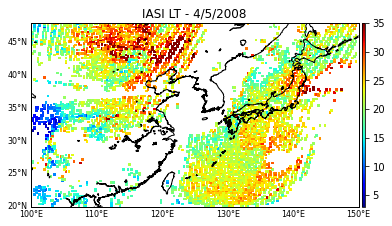

In [ ]:
imageLT.plot_original_image()

In [ ]:

# imageLT.get_image_name()
bgr , gray = imageLT.load_image_from_files(imageLT.get_image_name())
#imageLT.process_set_images(gray,bgr)
#imageLT.remove_temporal_files()
#imageLT.plot_original_image()


255 29


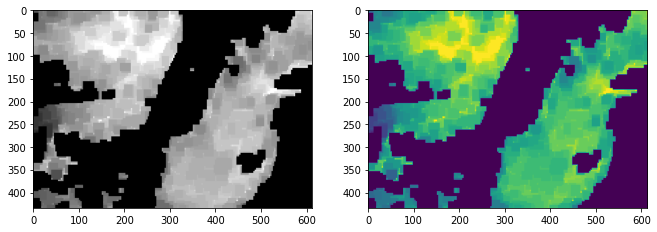

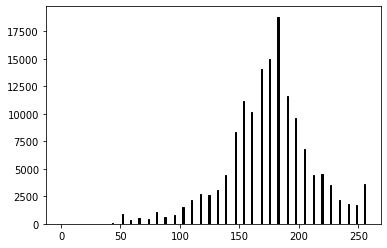

In [ ]:
image, foreground, background = imageLT.filter_image(gray)

kernel = np.ones((3,3),np.uint8)
foreground = cv2.dilate(foreground,kernel,iterations = 3)
image1 = cv2.bitwise_and(image,image, mask=foreground)
image2 = cv2.bitwise_and(image,image, mask=background)

myimage = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)
myimage = cv2.bitwise_and(myimage,myimage, mask=foreground)
#t_i = cv2.normalize(image1, None, 0, 255, cv2.NORM_MINMAX )
t_i = ma.masked_values(image1, 0.)
#print(t_i[~t_i.mask])
#mymask = t_i.mask
#image3 = cv2.bitwise_and(image, image, mask=mymask)

print(t_i.max(), t_i.min())

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(11,8))
ax0.imshow(myimage)
ax1.imshow(image1)
#fig.title('Morpho Operations - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year))

#ax1.imshow(background, cmap="gray")
#ax2.imshow(image2)
#ax3.imshow(foreground, cmap="gray")

fig3, ax3 = plt.subplots(1,1)
#ax3.hist(t_i.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
ax3.hist(t_i[~t_i.mask],256,[0,256], fc='k', ec='k')
#ax3.hist(image1.ravel(),254,[1,256], fc='k', ec='k')
fig3.show()

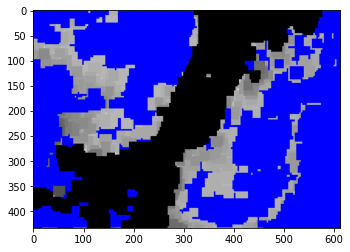

In [ ]:
"""
delta	          it compares (sizei−sizei−delta)/sizei−delta
min_area	      prune the area which smaller than minArea
max_area	      prune the area which bigger than maxArea
max_variation	  prune the area have similar size to its children
min_diversity	  for color image, trace back to cut off mser with diversity less than min_diversity
max_evolution	  for color image, the evolution steps
area_threshold	for color image, the area threshold to cause re-initialize
min_margin	    for color image, ignore too small margin
edge_blur_size	for color image, the aperture size for edge blur
"""

mser = cv2.MSER_create( 1, # delta 
                       100, # min_area
                       24400, #max_area 
                       4., # max_variation 
                       .1, # min_diversity 
                       2000, # max_evolution 
                       1.01, # area_threshold 
                       0.003, # min_margin
                       5) # edge_blur_size

# (1, 100, 20000, .25, 1., 1000, 1.001, 0.003, 5)
#regions, bboxes = mser.detectRegions(myimage)
#regions = sorted(regions, key=cv2.contourArea, reverse=True)

regions, bboxes = imageLT.get_mser_regions(image1, 100, 30000)
#print(image1.shape)
#print(len(regions))

img_mser = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)

for p in regions[:]:
  for k in p:
    cv2.circle(img_mser, (k[0],k[1]), radius=0, color=(0, 0, 255), thickness=-1)
plt.imshow(img_mser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


266042
127985.5

 Percentage background 51%


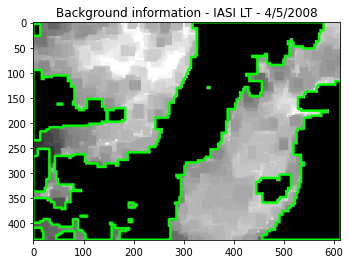

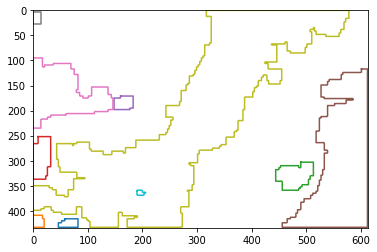

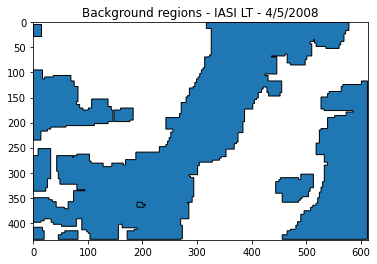

In [ ]:
contours, hierarchy = cv2.findContours(background, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

polys_back = list()

for contour in contours:
  myContour = list()
  for point in contour:
    myContour.append(point[0].tolist())
  polys_back.append(Polygon(myContour))

#myConts = list()
#for c in contours[0]:
#  myConts.append(c[0].tolist())
#back_polygons = Polygon(myConts)
#print(back_polygons.exterior.xy)

cnt = contours[4]
img_c = cv2.cvtColor(t_i, cv2.COLOR_GRAY2RGB)
#cv2.drawContours(img_c, [cnt], 0, (0,255,0), 3)
cv2.drawContours(img_c, contours, -1, (0,255,0), 3)
fig3,ax3 = plt.subplots(1,1)
ax3.imshow(img_c)
ax3.set_title('Background information - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year))

fig, ax = plt.subplots(1,1)
fig2 = plt.figure()

xx_range = [0, image.shape[1]]
yy_range = [0, image.shape[0]]

area_total = image.shape[1] * image.shape[0]
area_back = 0.
for poly in polys_back:
  
  if poly.area > 100.:

    area_back += poly.area
    x,y = poly.exterior.xy

    ax.plot(x,y)
    ax.set_xlim(*xx_range)
    ax.set_ylim(*yy_range)
    ax.invert_yaxis()

    ax1 = fig2.add_subplot(111)
    ring_patch = PolygonPatch(poly)
    ax1.add_patch(ring_patch)
    ax1.set_title('Background regions - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year))
    ax1.set_xlim(*xx_range)
    ax1.set_ylim(*yy_range)
    ax1.invert_yaxis()

print(area_total)
print(area_back)
area_dif = area_total - area_back 
print("\n Percentage background", str(int(area_dif * 100 / area_total)) + "%" )

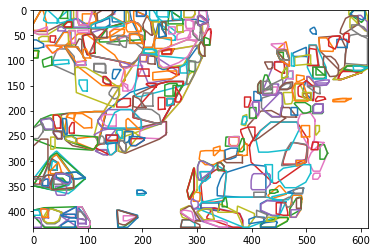

In [ ]:
fig, ax = plt.subplots(1,1)
xx_range = [0, image.shape[1]]
yy_range = [0, image.shape[0]]

for j,region_front in enumerate(regions[:]):
  region = list()
  hull = cv2.convexHull(region_front)
  for h in hull:
      region.append(h[0].tolist())
  region.append(region[0])
  poly_hull = Polygon(region)
  xxx,yyy = poly_hull.exterior.xy

  ax.plot(xxx,yyy)
  ax.set_xlim(*xx_range)
  ax.set_ylim(*yy_range)
  ax.invert_yaxis()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


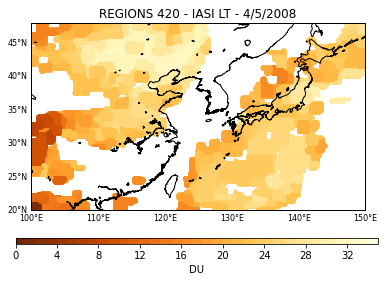

In [ ]:
kernel = np.ones((6,6), np.uint8)
background  = cv2.morphologyEx(background, cv2.MORPH_DILATE, kernel)
regx, regy, polys, lines, values = imageLT.set_mser_regions(t_i, background, regions[:])
imageLT.plot_mser_final_regions(t_i, regx, regy, values)

In [ ]:
gray_temp = gray.copy()
gray_temp = ma.masked_values(gray_temp, 0.)

for j,region_front in enumerate(regions[1:2]):
  region = list()
  hull = cv2.convexHull(region_front)
  for h in hull:
      region.append(h[0].tolist())
  region.append(region[0])
  _polygon = Polygon(region)

  _image = cv2.normalize(gray_temp, np.ones((gray_temp.shape[0], gray_temp.shape[0])) , imageLT.vmin, imageLT.vmax, cv2.NORM_MINMAX )

  minx, miny, maxx, maxy = _polygon.bounds #Boite englobante

  pixel_steps_x = _image.shape[1] * imageLT.degree / imageLT.colgrid.shape[1]
  pixel_steps_y = _image.shape[0] * imageLT.degree / imageLT.colgrid.shape[0]

  longs = np.arange(minx, maxx, pixel_steps_x)
  lats = np.arange(miny, maxy, pixel_steps_y)

  set_of_coordinates = list()
  for lon in longs:
    for lat in lats:
      break
      if np.isnan(lat):
        print("lat is nan")
      if np.isnan(lon):
        print("lon is nan")
      if image[int(lat), int(lon)] > 0:
        #print(image[int(lat), int(lon)])
        set_of_coordinates.append(image[int(lat), int(lon)])

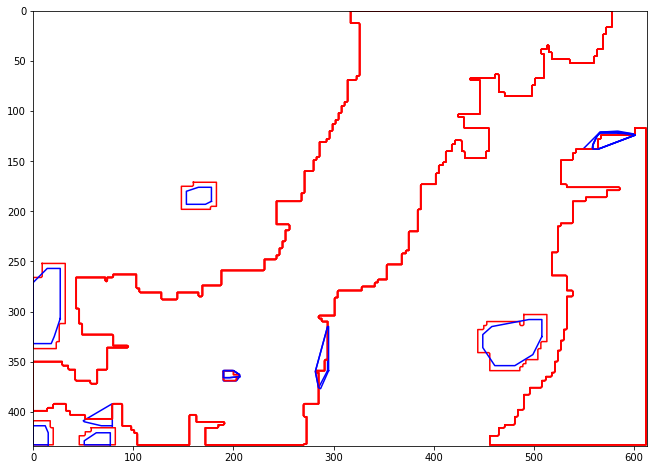

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(11,8))
xx_range = [0, image.shape[1]]
yy_range = [0, image.shape[0]]

global_regions_temp = regions.copy()

for i, poly_back in enumerate(polys_back[:]):
  for j,region_front in enumerate(regions[:]):
    region = list()
    hull = cv2.convexHull(region_front)
    for h in hull:
        region.append(h[0].tolist())
    region.append(region[0])
    poly_hull = Polygon(region)

    points_front = list()
    for my_r in region_front[:]:
      points_front.append(my_r.tolist())
    multi_points = MultiPoint(points_front)
    poly_front = Polygon(points_front)

    try: 
      if poly_back.intersects(multi_points):
        percentage = (poly_back.intersection(poly_hull).area/poly_hull.area) * 100

        xxx,yyy = poly_hull.exterior.xy

        if percentage > 50:
          global_regions_temp[j] = None
          x,y = poly_back.exterior.xy
          xx,yy = poly_front.exterior.xy
          ax.plot(x,y, color="red")
          ax.plot(xxx,yyy, color="blue")
          #ax.plot(xx,yy)
 
        ax.set_xlim(*xx_range)
        ax.set_ylim(*yy_range)
        ax.invert_yaxis()
    except: 
      print("An error occured ... going on...")
      print(points_front)
      print(poly_front)
      print("\n")


global_regions = list()

for region in global_regions_temp:
  if region is None:
    continue
  global_regions.append(region)

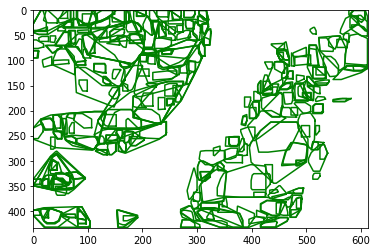

In [ ]:
fig, ax = plt.subplots(1,1)
xx_range = [0, image.shape[1]]
yy_range = [0, image.shape[0]]

global_regions = sorted(global_regions, key=cv2.contourArea, reverse=True)

for j,region in enumerate(global_regions[:]):
  tmp_reg = list()
  hull = cv2.convexHull(region)
  for h in hull:
      tmp_reg.append(h[0].tolist())
  tmp_reg.append(tmp_reg[0])
  poly_hull = Polygon(tmp_reg)

  #points_front = list()
  #for my_r in region_front[:]:
  #  points_front.append(my_r.tolist())
  #poly_front = Polygon(points_front)

  x,y = poly_hull.exterior.xy
  #xx,yy = poly_front.exterior.xy
  #xxx,yyy = poly_hull.exterior.xy
  ax.plot(x,y, color="green")
  #ax.plot(xxx,yyy, color="blue")
  #ax.plot(xx,yy)
  ax.set_xlim(*xx_range)
  ax.set_ylim(*yy_range)
  ax.invert_yaxis()

In [ ]:
kernel = np.ones((6,6), np.uint8)
background  = cv2.morphologyEx(background, cv2.MORPH_DILATE, kernel)
regx, regy, polys, lines, values = imageLT.set_mser_regions(t_i, background, global_regions[:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


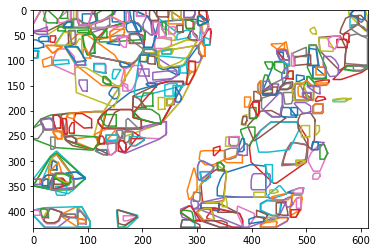

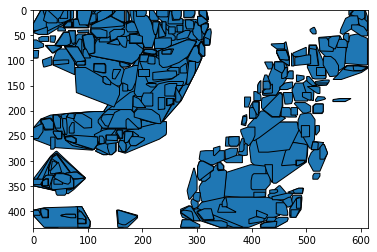

In [ ]:
fig, ax = plt.subplots(1,1)
xx_range = [0, image.shape[1]]
yy_range = [0, image.shape[0]]

fig2 = plt.figure()

for p in polys:
  x,y = p.exterior.xy

  ax.plot(x,y)
  ax.set_xlim(*xx_range)
  ax.set_ylim(*yy_range)
  ax.invert_yaxis()

  ax1 = fig2.add_subplot(111)
  ring_patch = PolygonPatch(p)
  ax1.add_patch(ring_patch)
  ax1.set_xlim(*xx_range)
  ax1.set_ylim(*yy_range)
  ax1.invert_yaxis()

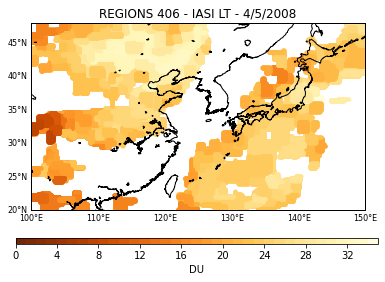

In [ ]:
imageLT.plot_mser_final_regions(t_i, regx, regy, values)

In [ ]:
len(polys)

406

In [ ]:
filename = imageLT.export_mser_regions(image, regx, regy, values)
image_flat = io.imread(filename)
image_color = image_flat.copy()
image_flat = cv2.cvtColor(image_flat, cv2.COLOR_RGBA2GRAY)
image_flat = np.where(image_flat == 255, 0, image_flat) 
#image_flat = np.where(image_flat == 255, 254, image_flat)

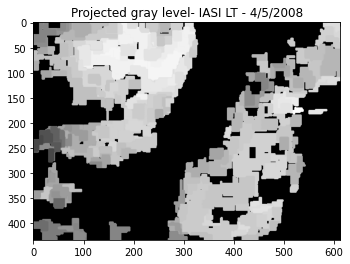

In [ ]:
f1, ax1 = plt.subplots(1,1)
xx_range = [0, image.shape[1]]
yy_range = [0, image.shape[0]]

#for p in polys:
#  x,y = p.exterior.xy

#  ax1.plot(x,y)
#  ax1.set_xlim(*xx_range)
#  ax1.set_ylim(*yy_range)
#  ax1.invert_yaxis()

ax1.imshow(image_flat, cmap="gray")
ax1.set_title('Projected gray level- IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year))
f1.show()

In [ ]:

class Pointi(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y
 
def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))
 
def selectConnects(p):
    if p != 0:
        connects = [Pointi(-1, -1), Pointi(0, -1), Pointi(1, -1), Pointi(1, 0), Pointi(1, 1), \
                    Pointi(0, 1), Pointi(-1, 1), Pointi(-1, 0)]
    else:
        connects = [ Pointi(0, -1),  Pointi(1, 0),Pointi(0, 1), Pointi(-1, 0)]
    return connects
 
def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Pointi(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Pointi(tmpX,tmpY))
    return seedMark



components = [1..8]
for val in components:


# regions 7
# contours 7


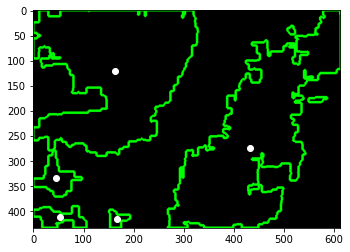

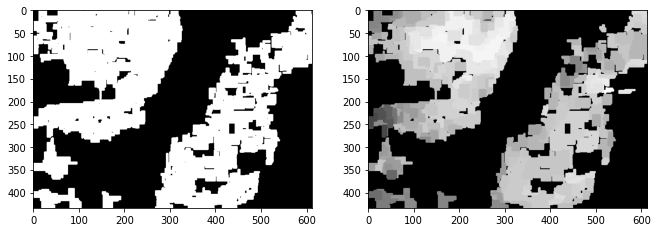

In [ ]:
_labels = ndimage.label(image_flat)
labels_comp = _labels[0]
num_regions_comp = _labels[1]
print("# regions",num_regions_comp)

# get contours (presumably just one around the nonzero pixels) 
contours = cv2.findContours(image_flat, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

print("# contours",len(contours))

polys_comp = list()
for contour in contours:
  myContour = list()
  for point in contour:
    myContour.append(point[0].tolist())
  polys_comp.append(Polygon(myContour))

fig3,ax3 = plt.subplots(1,1)
img_c = np.zeros(image_flat.shape, np.uint8)
img_c = cv2.cvtColor(img_c, cv2.COLOR_GRAY2RGB)
cv2.drawContours(img_c, contours, -1, (0,255,0), 3)

def getPoints(poly,image):
  """
  To avoid getting a coordinate when the pixel value is 0
  """
  xmin, ymin, xmax, ymax = poly.bounds
  _x, _y = 0., 0.

  while True:
    _x = random.uniform(xmin, xmax)
    _y = random.uniform(ymin, ymax)

    if poly.contains(Point(int(_x),int(_y))):
      # if this condition is true, add to a dataframe here
      if image[int(_y),int(_x)] == 0:
        print("DO IT AGAIN",_x, _y)
        getPoints(poly,image)
        return 0.
      break
  return Pointi(int(_y),int(_x))

centroids = list()
for i,poly in enumerate(polys_comp):
  if poly.area > 500.:
    x,y = poly.centroid.x, poly.centroid.y
    if image_flat[int(y),int(x)] == 0:
      point_to_search = getPoints(poly,image_flat)
    else:
      point_to_search = Pointi(int(y),int(x))

    centroids.append(point_to_search) 
    ax3.imshow(img_c)
    ax3.scatter([point_to_search.y],[point_to_search.x], c="white")

#seeds = [Point3(140,10)]#,Point(82,150),Point(200,280)]
binaryImg = regionGrow(image_flat,centroids,30)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,8))
ax1.imshow(binaryImg, cmap="gray")
###ax1.scatter([x],[y])
ax2.imshow(image_flat, cmap="gray")

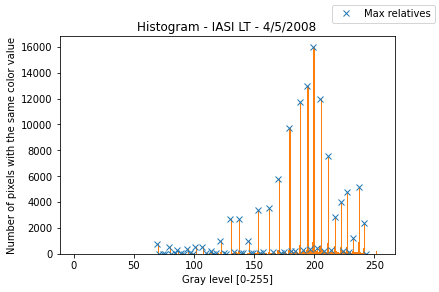

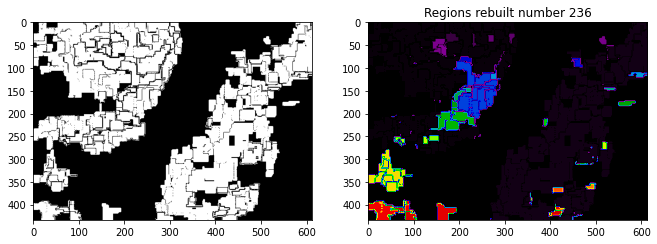

In [ ]:
# Make bins
bins = np.arange(image_flat.min() + 1, 254)
# Compute histogram
h, _ = np.histogram(image_flat, bins)
bins = bins[:len(bins) - 1]

peaks, _ = find_peaks(h) #,height=1000)

# Main condition to create the threshold
gray_levels_selected = bins[peaks]
black_image = np.zeros(image_flat.shape, np.uint8)

for i, value in enumerate(gray_levels_selected):
  black_image[image_flat == value] = 1

kernel = np.ones((3,3), np.uint8)
#black_image  = cv2.morphologyEx(black_image, cv2.MORPH_OPEN, kernel)
#black_image  = cv2.morphologyEx(black_image, cv2.MORPH_ERODE, kernel)

labels, num = measure.label(black_image, return_num=True, connectivity=None, background=0.) 

f2,ax2 = plt.subplots(1,1)
ax2.plot(peaks,h[peaks], "x", label="Max relatives")
ax2.hist(image_flat.ravel(),254,[1,254]);
ax2.set_title('Histogram - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year))
ax2.set_xlabel("Gray level [0-255]")
ax2.set_ylabel("Number of pixels with the same color value")
f2.legend()
f2.show()

fig0, (ax0,ax1) = plt.subplots(1,2, figsize=(11,8))
ax0.imshow(black_image, cmap="gray")
ax1.imshow(labels, cmap='nipy_spectral')
ax1.set_title("Regions rebuilt number " + str(num))
fig0.show()

474 406 475


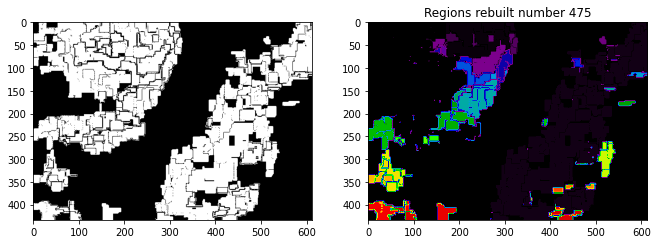

In [ ]:
_labels = ndimage.label(black_image)

lbl = _labels[0]
num_regions = _labels[1]

valuesNorm = (values - min(values)) / (max(values) - min(values))

# Center of mass of each region
centers = ndimage.measurements.center_of_mass(black_image, lbl, np.arange(1,num_regions))
print(len(centers), len(valuesNorm), num_regions)

fig0, (ax0,ax1) = plt.subplots(1,2, figsize=(11,8))
ax0.imshow(black_image, cmap="gray")
ax1.imshow(lbl, cmap='nipy_spectral')
#ax1.scatter([myX], [myY], c="white")
ax1.set_title("Regions rebuilt number " + str(num_regions))
fig0.show()

In [ ]:
image_regs_kms = image_flat.copy()

image_3 = image_flat.copy()
image_3 = cv2.normalize(image_3, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

image_norm = list()
for i,row in enumerate(image_3[:]):
  for j,col in enumerate(row[:]):
    _x = i / image_3.shape[1]
    _y = j / image_3.shape[0]
    _g = col
    image_norm.append(np.array([_g]))

image_norm_array = np.asarray(image_norm)
image_norm_array = np.float32(image_norm_array)

for i in image_norm_array[:10]:
  print(i)

pixel_values = image_regs_kms.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

print(pixel_values.shape,image_norm_array.shape )

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
(266042, 1) (266042, 1)


(266042, 1) (266042, 1)


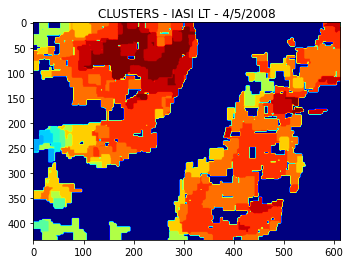

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 30
retval, labels1, centers2 = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

retval11, labels11, centers11 = cv2.kmeans(image_norm_array, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
#predicted_kmeans = kmeans.predict(X, sample_weight = Y)

# convert data into 8-bit values
#centers2 = np.uint8(centers2)
segmented_data = centers2[labels1.flatten()]
segmented_data_1 = centers11[labels11.flatten()]


print(segmented_data.shape, segmented_data_1.shape)

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image_regs_kms.shape))
segmented_image = segmented_image.astype(np.uint8)

#image_color = cv2.cvtColor(image_flat , cv2.COLOR_GRAY2RGB)
#segmented_image_2 = segmented_data_1.reshape(image_color.shape)

plt.imshow(segmented_image, cmap="jet")
plt.title('CLUSTERS - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
plt.show()

[70, 79, 83, 87, 95, 108, 134, 164, 188, 204, 223, 238]


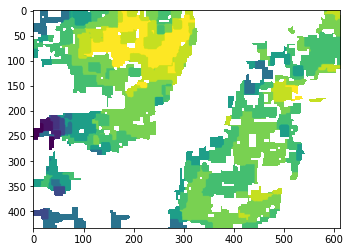

In [ ]:
s_i = segmented_image.copy()
s_i = ma.masked_values(s_i, 0.)

grays_level_predicted = list() # list of all gray levels needed as cluster

for i,val in enumerate(s_i):
  row = list(set(val.tolist())) # to get onique values from list
  for v in row:
    if v is not None and v not in grays_level_predicted:
      grays_level_predicted.append(v)

grays_level_predicted.sort()
print(grays_level_predicted)

#for cluster in grays_level_predicted[:len(grays_level_predicted) - 3]:
#  s_i[s_i == cluster] = 0
#s_i = ma.masked_values(s_i, 0.)

plt.imshow(s_i)

12 12


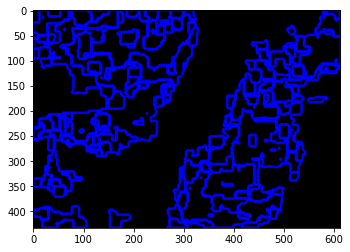

In [ ]:
c_i = s_i.copy()
g_l = grays_level_predicted.copy()

all_contours_regions = list()
all_content_regions = list()

for k in range(len(g_l)):
  tmp = c_i.copy()
  black = np.zeros(c_i.shape, np.uint8)
  for i in range(len(g_l)):
    if i is k:
      #black = np.where(tmp == g_l[i], 255, black) 
      #print(black.shape)
      black = np.where(tmp == g_l[i], 255, black) 
      #black[tmp == g_l[i]] = 1
    if i is not k:
      tmp[tmp == g_l[i]] = 0
  all_content_regions.append(black)
  tmp = ma.masked_values(tmp, 0.)
  contours, _ = cv2.findContours(tmp, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  all_contours_regions.append(contours)
  
fig3,ax3 = plt.subplots(1,1)
img_c = np.zeros(c_i.shape, np.uint8)
img_c = cv2.cvtColor(img_c, cv2.COLOR_GRAY2RGB)

print(len(all_contours_regions),len(all_content_regions))

for i, cont in enumerate(all_contours_regions):
  cv2.drawContours(img_c, cont, -1, (0,0,255), 3)
  ax3.imshow(img_c)

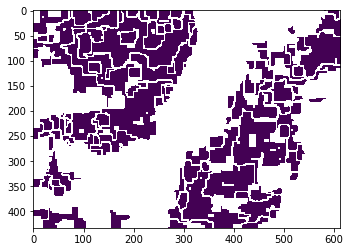

In [ ]:
f,x = plt.subplots(1,1)
for a in all_content_regions[:]:
  a = ma.masked_values(a, 0.)
  x.imshow(a)

In [ ]:
all_polys_regions = list()
all_points_regions = list()
for i,contours in enumerate(all_contours_regions[:]):
  polys_regions = list()
  points_regions = list()
  for contour in contours:
    if len(contour) > 2:
      myContour = list()
      for point in contour:
        myContour.append(point[0].tolist())
      polys_regions.append(Polygon(myContour))
      points_regions.append(MultiPoint(myContour))

  all_polys_regions.append(polys_regions)
  all_points_regions.append(points_regions)

print(len(all_polys_regions))

12


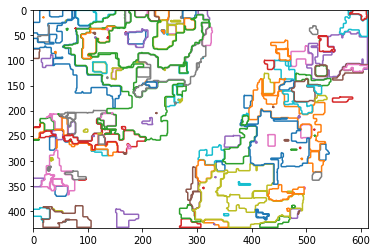

In [ ]:
fig, ax = plt.subplots(1,1)

xx_range = [0, c_i.shape[1]]
yy_range = [0, c_i.shape[0]]

for polys in all_polys_regions:
  for poly in polys:
    x,y = poly.exterior.xy

    ax.plot(x,y)
    ax.set_xlim(*xx_range)
    ax.set_ylim(*yy_range)
    ax.invert_yaxis()

In [ ]:
def print_confussion_matrix_results(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  print("TPR:",TPR,"PPV:",PPV,"NPV:",NPV,"FPR",FPR,"FNR",FNR,"FDR",FDR,"ACC",ACC)

pixels: true_positives 0
pixels: false_positives 767
pixels: false_negatives 22126
pixels: true_negatives 243149


total_pixels_blancs_ref 22126
total_pixels_blancs_test 767


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


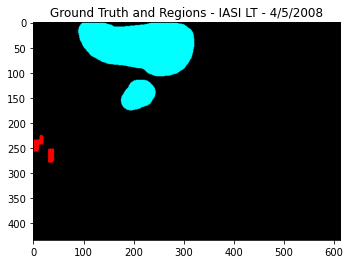

pixels: true_positives 0
pixels: false_positives 503
pixels: false_negatives 22126
pixels: true_negatives 243413


total_pixels_blancs_ref 22126
total_pixels_blancs_test 503


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


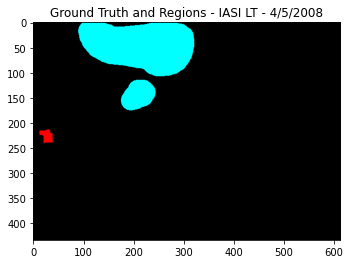

pixels: true_positives 0
pixels: false_positives 59
pixels: false_negatives 22126
pixels: true_negatives 243857


total_pixels_blancs_ref 22126
total_pixels_blancs_test 59


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


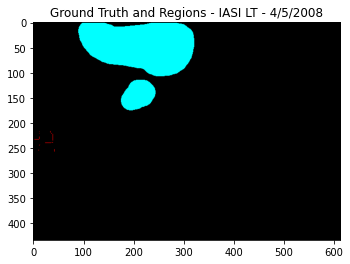

pixels: true_positives 0
pixels: false_positives 363
pixels: false_negatives 22126
pixels: true_negatives 243553


total_pixels_blancs_ref 22126
total_pixels_blancs_test 363


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


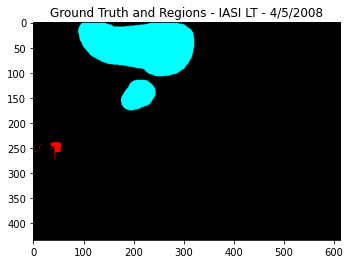

pixels: true_positives 0
pixels: false_positives 476
pixels: false_negatives 22126
pixels: true_negatives 243440


total_pixels_blancs_ref 22126
total_pixels_blancs_test 476


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


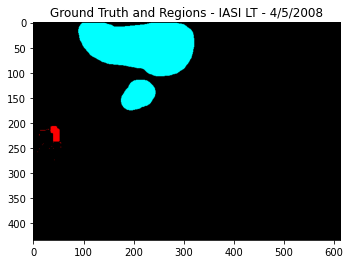

pixels: true_positives 0
pixels: false_positives 1489
pixels: false_negatives 22126
pixels: true_negatives 242427


total_pixels_blancs_ref 22126
total_pixels_blancs_test 1489


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


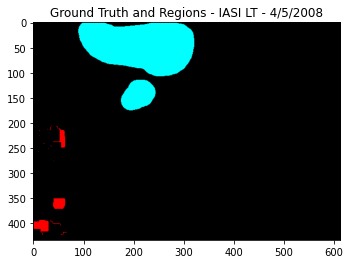

pixels: true_positives 0
pixels: false_positives 8638
pixels: false_negatives 22126
pixels: true_negatives 235278


total_pixels_blancs_ref 22126
total_pixels_blancs_test 8638


perc: true_positives 0 %
perc: false_positives 100 %
perc: false_negatives 100 %


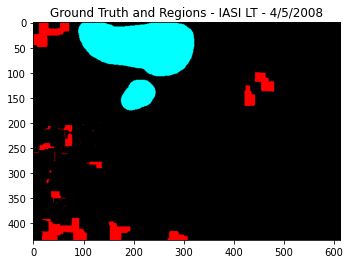

pixels: true_positives 645
pixels: false_positives 14179
pixels: false_negatives 21481
pixels: true_negatives 229737


total_pixels_blancs_ref 22126
total_pixels_blancs_test 14824


perc: true_positives 4 %
perc: false_positives 95 %
perc: false_negatives 97 %


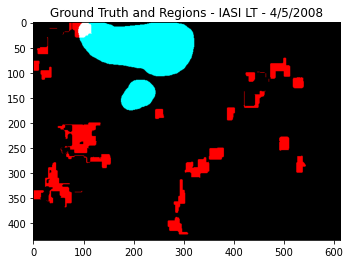

pixels: true_positives 2019
pixels: false_positives 35516
pixels: false_negatives 20107
pixels: true_negatives 208400


total_pixels_blancs_ref 22126
total_pixels_blancs_test 37535


perc: true_positives 5 %
perc: false_positives 94 %
perc: false_negatives 90 %


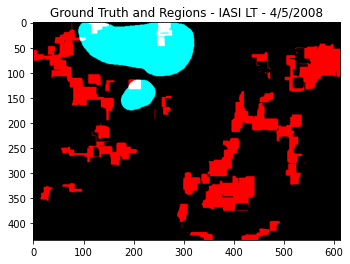

pixels: true_positives 3707
pixels: false_positives 36999
pixels: false_negatives 18419
pixels: true_negatives 206917


total_pixels_blancs_ref 22126
total_pixels_blancs_test 40706


perc: true_positives 9 %
perc: false_positives 90 %
perc: false_negatives 83 %


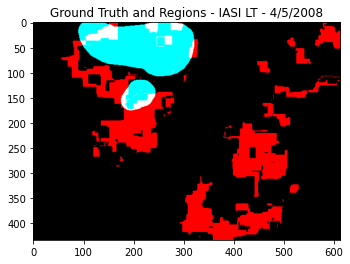

pixels: true_positives 6479
pixels: false_positives 8375
pixels: false_negatives 15647
pixels: true_negatives 235541


total_pixels_blancs_ref 22126
total_pixels_blancs_test 14854


perc: true_positives 43 %
perc: false_positives 56 %
perc: false_negatives 70 %


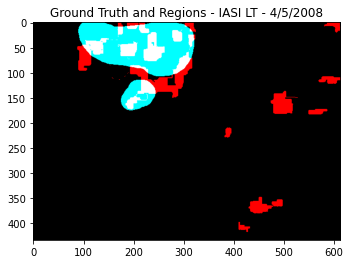

pixels: true_positives 8710
pixels: false_positives 2467
pixels: false_negatives 13416
pixels: true_negatives 241449


total_pixels_blancs_ref 22126
total_pixels_blancs_test 11177


perc: true_positives 77 %
perc: false_positives 22 %
perc: false_negatives 60 %


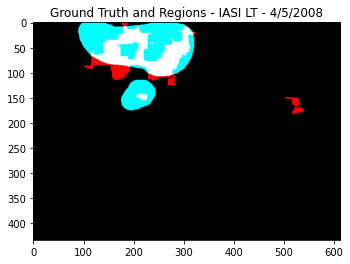

In [ ]:
directories = os.listdir( imageLT.get_DIR_TRAIN() )
 
# This would print all the files and directories
for file in directories:
  only_png_files = re.search(".jpg", file)
  if only_png_files is not None:
    only_same_day = re.search(str(imageLT.get_year())+"%02d"%imageLT.get_month()+"%02d"%imageLT.get_day(), file)
    if only_same_day is not None:
      only_image_type = re.search(imageLT.get_image_type(), file)
      if only_image_type is not None:
        img = io.imread(imageLT.get_DIR_TRAIN() + file)
        #img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        #img_gray = ma.masked_values(img_gray, 255.)
        img_gray = cv2.GaussianBlur(img_gray,(5,5),cv2.BORDER_DEFAULT)

        best_regions = list()

        for region_ in all_content_regions:
          im_orig = region_.copy()
          im_bin = img_gray.copy()

          im_orig = cv2.normalize(im_orig, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
          im_bin = cv2.normalize(im_bin, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
          
          #X_test = im_orig.reshape((-1, 1)).tolist()
          #X_test = np.float32(X_test)

          #y_test = im_bin.reshape((-1, 1)).tolist()
          #y_test = np.float32(y_test)

          #conf_matrix = metrics.confusion_matrix(y_test, X_test)
          #print(metrics.classification_report(y_test, X_test))
          #print_confussion_matrix_results(conf_matrix)
          
          # compute the error image between im_bin and im_orig (the ideal solution) using np.abs and np.sum 
          # PORCENTAJE DE PIXELES DENTRO Y FUERA DE LA FIGURA VERITE TERRAIN
          true_positives = 0
          false_positives = 0
          false_negatives = 0
          true_negatives = 0
          
          for i,x in enumerate(im_bin[:]):
            for j,y in enumerate(x[:]):
              if y == 1:
                if im_orig[i][j] == 1:
                  # True positive
                  true_positives += 1
                else:
                  false_negatives += 1
              else:
                if im_orig[i][j] == 1:
                  # False positives
                  false_positives += 1
                else:
                  true_negatives += 1
              

          print("pixels: true_positives", true_positives)
          print("pixels: false_positives",false_positives)
          print("pixels: false_negatives",false_negatives)
          print("pixels: true_negatives",true_negatives)
          print("\n")
          total_pixels_blancs_ref = len(im_bin[im_bin == 1])
          total_pixels_blancs_test = len(im_orig[im_orig == 1])
          print("total_pixels_blancs_ref", total_pixels_blancs_ref)
          print("total_pixels_blancs_test", total_pixels_blancs_test)
          print("\n")
          print("perc: true_positives", int(true_positives * 100 / total_pixels_blancs_test), "%")
          print("perc: false_positives", int(false_positives * 100 / total_pixels_blancs_test), "%")
          print("perc: false_negatives", int(false_negatives * 100 / total_pixels_blancs_ref), "%")

          if int(true_positives * 100 / total_pixels_blancs_test) >= 30:
            best_regions.append(im_orig)

          error = np.sum(np.abs(im_orig - im_bin))

          # visualize the differences between the original image and the solution
          plt.figure()
          plt.title('Ground Truth and Regions - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
          plt.imshow(np.dstack((np.int_(im_orig), im_bin, im_bin))*255)
          plt.show()

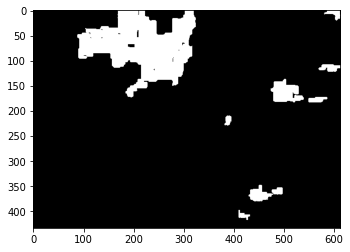

In [ ]:
fig, axx = plt.subplots(1,1)

black_image = np.zeros(best_regions[0].shape, np.uint8)

for reg in best_regions[:]:
  tmp = ma.masked_values(reg, 0.)
  for i,x in enumerate(tmp[:]):
    for j,y in enumerate(x):
      if isinstance(y, np.uint8):
        black_image[i][j] = 1

axx.imshow(black_image, cmap="gray")

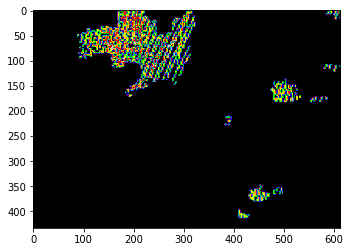

In [ ]:
final_image = cv2.bitwise_and(gray, gray, mask=black_image)
plt.imshow(final_image, cmap="nipy_spectral")

In [ ]:
#l_r = np.array([0,100,0])
        #u_r = np.array([5,255,255])

        #l_r = np.array([36,0,0])
        #u_r = np.array([86,255,255])

        #l_r = np.array([20, 100, 100])
        #u_r = np.array([30, 255, 255])

        #Define threshold color range to filter
        #mask_red = cv2.inRange(img_hsv, l_r, u_r)

        # Bitwise-AND mask and original image
        #res = cv2.bitwise_and(img_hsv, img_hsv, mask=mask_red)
        #ratio = cv2.countNonZero(mask_red)/(img_hsv.size/3)
        #print('pixel percentage:', np.round(ratio*100, 2))
        #pollution = cv2.bitwise_and(img, img, mask=mask_red)

        #xs = [pnt[0] if background[pnt[1],pnt[0]] != 255 else np.nan for pnt in r[:]]
        #ys = [pnt[1] if background[pnt[1],pnt[0]] != 255 else np.nan for pnt in r[:]]

        contours, _ = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      
        polys_ref = list()
        #hulls_ref = list()
        for contour in contours:
          if len(contour) > 2:
            myContour = list()
            for point in contour:
              myContour.append(point[0].tolist())
            polys_ref.append(Polygon(myContour))
        #    hulls_ref.append(cv2.convexHull(contour))
        #region = list()
        #for hull in hulls_ref:
        #  for h in hull:
        #    region.append(h[0].tolist())
        #  region.append(region[0])
        #  poly_hull = Polygon(region)

        #fig3,ax3 = plt.subplots(1,1)
        #img_c = np.zeros(img_gray.shape, np.uint8)
        #img_c = cv2.cvtColor(img_c, cv2.COLOR_GRAY2RGB)
        #cv2.drawContours(img_c, contours, -1, (255,0,0), 3)
        #ax3.imshow(img_c)
        x_range = [0, img.shape[1]]
        y_range = [0, img.shape[0]]

        fig, ax = plt.subplots(1,1)
        fig2 = plt.figure()

        for a,poly_ref in enumerate(polys_ref):
          if poly_ref.area >= 100.:
            y_true = poly_ref

            for inte in y_true.interiors:
              print(inte)

            for i,polys in enumerate(all_polys_regions):
              for j,poly_front in enumerate(polys[:1]):
                if poly_front.area > 0:
                  y_predict = poly_front
                  if y_true.intersects(all_points_regions[i][j]):

                    #y_true.contains()
                    #print(y_predict)
                    #print("REF",poly_ref)
                    #print("\n")
                    #print("FOUND",poly_front)
                    #break
                    #cnf_matrix = confusion_matrix(poly_ref, poly_front)

                    #percentage = (poly_front.intersection(poly_hull).area/poly_front.area) * 100
                    #print("percentage", percentage)
                    
                    x,y = poly_front.exterior.xy
                    x2,y2 = poly_ref.exterior.xy
                    ax.plot(x,y, color="green")
                    ax.plot(x2,y2, color="red")
                    ax.set_xlim(*x_range)
                    ax.set_ylim(*y_range)
                    ax.invert_yaxis()

                    ax1 = fig2.add_subplot(111)
                    ring_patch = PolygonPatch(poly_front)
                    ax1.add_patch(ring_patch)
                    ax1.set_xlim(*x_range)
                    ax1.set_ylim(*y_range)
                    ax1.invert_yaxis()
        #fig2, ax2 = plt.subplots(1,1)
        #for j,r in enumerate(regions_target):
        #  region = list()
        #  hull = cv2.convexHull(r)

        #  for h in hull:
        #      region.append(h[0].tolist())

        #  region.append(region[0])
        #  poly_target = Polygon(region)
        #  line = LineString(region)
        #  x,y = line.xy

        #  #my_line = lines[i]
        #  #_x,_y = my_line.xy
        #  ax2.plot(x,y, color="yellow")
        #  #ax2.scatter(regx[i], regy[i], marker='.',color=cmap(norm(values[i])))
        #  ax2.set_xlim(*x_range)
        #  ax2.set_ylim(*y_range)
        #  ax2.invert_yaxis()

IndentationError: ignored

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image_1 = np.copy(image_regs_kms)
# convert to the shape of a vector of pixel values
masked_image_1 = masked_image_1.reshape((-1, 1))
# color (i.e cluster) to disable

#masked_image_1[labels1.flatten() == 0] = 0
#masked_image_1[labels1.flatten() == 1] = 0
#masked_image_1[labels1.flatten() == 2] = [255, 255, 255]
#masked_image_1[labels1.flatten() == 3] = 0
#masked_image_1[labels1.flatten() == 4] = 0

# convert back to original shape
masked_image_1 = masked_image_1.reshape(image_regs_kms.shape)

#dim = (80, imageLT.colgrid.shape[0])
#print(dim)
masked_image = cv2.resize(masked_image, dim, interpolation = cv2.INTER_AREA)

# show the image

plt.imshow(masked_image_1)
plt.title('CLUSTERS Selection - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
plt.show()

In [ ]:
image_original = io.imread("color-" + imageLT.get_image_name())
image_original = cv2.cvtColor(image_original, cv2.COLOR_RGBA2RGB )
print(image_original.shape)

pixel_values = image_original.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 5
retval, labels2, centers2 = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  
# convert data into 8-bit values
centers2 = np.uint8(centers2)
segmented_data = centers2[labels2.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image_original.shape))

plt.imshow(segmented_image)
plt.title('CLUSTERS - Initial image - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
plt.show()

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image_original)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable

print(labels2.max(), labels2.min())

masked_image[labels2.flatten() == 0] = [255, 255, 255]
masked_image[labels2.flatten() == 1] = [255, 255, 255]
#masked_image[labels2.flatten() == 2] = [255, 255, 255]
masked_image[labels2.flatten() == 3] = [255, 255, 255]
masked_image[labels2.flatten() == 4] = [255, 255, 255]

# convert back to original shape
masked_image = masked_image.reshape(image_original.shape)

#dim = (80, imageLT.colgrid.shape[0])
#print(dim)
#masked_image = cv2.resize(masked_image, dim, interpolation = cv2.INTER_AREA)

# show the image
plt.imshow(masked_image)
plt.title('CLUSTERS Selection (Hidden 0,1,3,4) - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
#m=Basemap(llcrnrlon=100.,llcrnrlat=20.,urcrnrlon=150.,urcrnrlat=48.,resolution='i')
#m.drawcoastlines()
#m.drawmapboundary()
#m.drawmeridians(np.r_[100:151:10], labels=[0,0,0,1], color='grey',fontsize=8,linewidth=0)
#m.drawparallels(np.r_[20:48:5], labels=[1,0,0,0], color='grey',fontsize=8,linewidth=0)
plt.show()

In [ ]:
#NOT RUN

image_3 = image_flat.copy()
image_3 = cv2.normalize(image_3, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

image_norm = list()
for i,row in enumerate(image_3[:]):
  row_norm = list()
  for j,col in enumerate(row[:]):
    _x = i / image_3.shape[1]
    _y = j / image_3.shape[0]
    _g = col
    #row_norm.append(np.array([_x,_y,_g]))
    image_norm.append(np.array([_x,_y,_g]))

image_norm_array = np.asarray(image_norm)
print("\n")
print(image_norm_array.shape)

wcss = list()
for i in range(1,10):
  kmeanstest = KMeans(n_clusters=i, random_state=0).fit(image_norm_array)
  wcss.append(kmeanstest.inertia_)

fig0, ax = plt.subplots(1,1)
#ax.scatter(imageLT.N_CLUSTERS,wcss[imageLT.N_CLUSTERS], c='red', label="Selected cluster")
ax.plot( np.arange(len(wcss)) , wcss)
ax.set_title("Optimal number of clusters")
ax.set_xlabel("Number of clusters (k)")
ax.set_ylabel("Inertia")
fig0.legend()

clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(image_norm_array)
x, y = image_3.shape
cluster_centers = clustering.cluster_centers_
cluster_labels = clustering.labels_
cluster_regions = cluster_centers[cluster_labels]

print(cluster_regions)

#fig0, ax0 = plt.subplots(1,1)
#ax0.imshow(cluster_centers[cluster_labels].reshape(x, y), cmap="jet" )
#ax0.set_title('CLUSTERS - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
#fig0.show()

In [ ]:
# NOT RUN

coordinatesList = list()

# Ploting weights
w_coords_x = list()
w_coords_y = list()
w_grays = list()

# Normalization for gray values (Pollution)

print(len(valuesNorm))
for i,value in enumerate(valuesNorm[:len(centers)]):
  # Normalization for X and Y
  coord_x = centers[i][0] / image.shape[0]
  coord_y = centers[i][1] / image.shape[1]
  gray_value = value * 5

  ## To apply kmeans
  coordinatesList.append(np.array([coord_x,coord_y, gray_value]))
  
coordinatesArray = np.asarray(coordinatesList)

number_of_tests = 50

if number_of_tests > len(centers):
  number_of_tests = len(centers)

# imageLT.N_CLUSTERS

#image_flat = cv2.normalize(image_flat, image_flat.shape , 0, 1, cv2.NORM_MINMAX )
image4 = image_flat.copy()
image4 = cv2.normalize(image4, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

x_flat, y_flat = image4.shape
image_flat_x = image4.reshape(x_flat*y_flat, 1)
print(image_flat_x.shape)


# TESTING KMEANS
wcss = list()
for i in range(1,10):
  kmeanstest = KMeans(n_clusters=i, random_state=0).fit(image_flat_x)
  wcss.append(kmeanstest.inertia_)
  
fig0, ax = plt.subplots(1,1)
#ax.scatter(imageLT.N_CLUSTERS,wcss[imageLT.N_CLUSTERS], c='red', label="Selected cluster")
ax.plot( np.arange(len(wcss)) , wcss)
ax.set_title("Optimal number of clusters")
ax.set_xlabel("Number of clusters (k)")
ax.set_ylabel("Inertia")
fig0.legend()

clustering = KMeans(n_clusters=5, max_iter=300)
#clustering.fit(coordinatesArray)
clustering.fit(image_flat_x)

pixels: true_positives 248
pixels: false_positives 0
pixels: false_negatives 57187
pixels: true_negatives 208607


total_pixels_blancs_ref 57435
total_pixels_blancs_test 248


perc: true_positives 100 %
perc: false_positives 0 %
perc: false_negatives 99 %


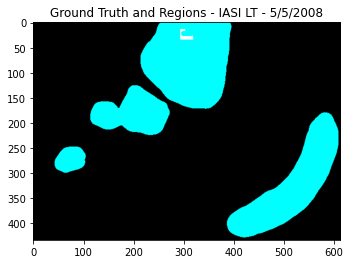

In [ ]:
directories = os.listdir( imageLT.get_DIR_TRAIN() )
 
# This would print all the files and directories
for file in directories:
  only_png_files = re.search(".jpg", file)
  if only_png_files is not None:
    only_same_day = re.search(str(imageLT.get_year())+"%02d"%imageLT.get_month()+"%02d"%imageLT.get_day(), file)
    if only_same_day is not None:
      only_image_type = re.search(imageLT.get_image_type(), file)
      if only_image_type is not None:
        img = io.imread(imageLT.get_DIR_TRAIN() + file)
        #img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        #img_gray = ma.masked_values(img_gray, 255.)
        img_gray = cv2.GaussianBlur(img_gray,(5,5),cv2.BORDER_DEFAULT)

        im_orig = all_content_regions[9].copy()
        im_bin = img_gray.copy()

        im_orig = cv2.normalize(im_orig, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        im_bin = cv2.normalize(im_bin, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        
        from sklearn import metrics, neighbors

        X_test = im_orig.reshape((-1, 1)).tolist()
        #X_test = np.float32(X_test)

        y_test = im_bin.reshape((-1, 1)).tolist()
        #y_test = np.float32(y_test)

        conf_matrix = metrics.confusion_matrix(y_test, X_test)
        #print(metrics.classification_report(y_test, X_test))
        #print_confussion_matrix_results(conf_matrix)
        
        # compute the error image between im_bin and im_orig (the ideal solution) using np.abs and np.sum 
        # PORCENTAJE DE PIXELES DENTRO Y FUERA DE LA FIGURA VERITE TERRAIN
        true_positives = 0
        false_positives = 0
        false_negatives = 0
        true_negatives = 0
        
        for i,x in enumerate(im_bin[:]):
          for j,y in enumerate(x[:]):
            if y == 1:
              if im_orig[i][j] == 1:
                # True positive
                true_positives += 1
              else:
                false_negatives += 1
            else:
              if im_orig[i][j] == 1:
                # False positives
                false_positives += 1
              else:
                true_negatives += 1
            

        print("pixels: true_positives", true_positives)
        print("pixels: false_positives",false_positives)
        print("pixels: false_negatives",false_negatives)
        print("pixels: true_negatives",true_negatives)
        print("\n")
        total_pixels_blancs_ref = len(im_bin[im_bin == 1])
        total_pixels_blancs_test = len(im_orig[im_orig == 1])
        print("total_pixels_blancs_ref", total_pixels_blancs_ref)
        print("total_pixels_blancs_test", total_pixels_blancs_test)
        print("\n")
        print("perc: true_positives", int(true_positives * 100 / total_pixels_blancs_test), "%")
        print("perc: false_positives", int(false_positives * 100 / total_pixels_blancs_test), "%")
        print("perc: false_negatives", int(false_negatives * 100 / total_pixels_blancs_ref), "%")

        error = np.sum(np.abs(im_orig - im_bin))

        # visualize the differences between the original image and the solution
        plt.figure()
        plt.title('Ground Truth and Regions - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
        plt.imshow(np.dstack((np.int_(im_orig), im_bin, im_bin))*255)
        plt.show()
        

In [ ]:
#colors = sns.color_palette("YlOrBr_r", max(clustering.labels_) + 1)

#cmap = matplotlib.colors.ListedColormap(colors)
#norm = matplotlib.colors.BoundaryNorm(np.arange(max(clustering.labels_) + 1) - 0.5, cmap.N)

#x, y = image.shape
#cluster_centers = clustering.cluster_centers_
#cluster_labels = clustering.labels_

#cluster_regions = cluster_centers[cluster_labels]

#print("centers",clustering.cluster_centers_, len(clustering.cluster_centers_))
#print("labels",clustering.labels_, clustering.labels_.shape)
#print("img",lbl.shape)

#print(lbl.max(), lbl.min())

#lbl_tmp = labels.copy()

#for i, value in enumerate(clustering.labels_):
#  is_zero = lbl_tmp[lbl_tmp == 0]
#  if (is_zero).any():
#    continue
#  lbl_tmp[lbl_tmp == i] = value

#lbl_tmp[lbl_tmp == 1] = 0
#lbl_tmp[lbl_tmp == 2] = 0
#lbl_tmp[lbl_tmp == 3] = 0
#lbl_tmp[lbl_tmp == 4] = 0
#lbl_tmp[lbl_tmp == 5] = 0

#fig0, (ax0,ax1) = plt.subplots(1,2, figsize=(11,8))
#ax0.imshow(labels, cmap='nipy_spectral')
#ax1.imshow(lbl_tmp, cmap='nipy_spectral')
#ax0.set_title("Regions rebuilt number " + str(num))
#fig0.show()
#fig0, ax0 = plt.subplots(1,1)
#ax0.imshow(cluster_centers[cluster_labels].reshape(x, y), cmap="jet" )
#ax0.set_title('CLUSTERS - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
#fig0.show()

In [ ]:
#cluster_centers_test = cluster_centers.copy()
#cluster_labels_test = cluster_labels.copy()


#print(cluster_centers_test)


#cluster_centers_test[cluster_labels_test.flatten() == 1] = 0
#cluster_centers_test[cluster_labels_test.flatten() == 2] = 0
#cluster_centers_test[cluster_labels_test.flatten() == 4] = 0

#fig0, ax0 = plt.subplots(1,1)
#ax0.imshow(cluster_centers_test[cluster_labels_test].reshape(x, y), cmap="jet" )
#ax0.set_title('CLUSTERS - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
#fig0.show()

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
#image_flat_0 = image_flat.copy()
# convert to the shape of a vector of pixel values
#image_flat_x_0 = image_flat_x.copy()
# color (i.e cluster) to disable

#image_flat_x_0[cluster_labels.flatten() == 0] = 0
#image_flat_x_0[cluster_labels.flatten() == 1] = 0
#image_flat_x_0[cluster_labels.flatten() == 2] = 0
#image_flat_x_0[cluster_labels.flatten() == 3] = 0
#image_flat_x_0[cluster_labels.flatten() == 4] = 0

# convert back to original shape
#image_flat_x_0 = image_flat_x_0.reshape(image_flat_0.shape)

# show the image
#plt.imshow(image_flat_x_0, cmap="jet")
#plt.title('CLUSTERS Selection - IASI ' + imageLT.image_type + " - " + str(imageLT.day) +"/"+ str(imageLT.month) +"/"+ str(imageLT.year) )
#plt.show()

In [ ]:
#labels, centers = imageLT.classify_neighbors(image, regx, regy,polys, values)

In [ ]:
#imageLT.divide_regions(image,regx, regy, polys, lines, values)

In [ ]:
#img = io.imread("testca.png")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#mser = cv2.MSER_create(1, 100, 20000, .25, 1., 1000, 1.001, 0.003, 5)
#reg2, _ = mser.detectRegions(img)
#reg2 = sorted(reg2, key=cv2.contourArea, reverse=True)

#for p in reg2[:]:
#  for k in p:
#    cv2.circle(img, (k[0],k[1]), radius=0, color=(0, 0, 255), thickness=-1)

#plt.imshow(img)